In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv('train.csv')

In [ ]:
df.head(3)

,ID,STAY_DRG_CD,STAY_FROM_DT,STAY_THRU_DT,STUS_CD,TYPE_ADM,SRC_ADMS,AD_DGNS,DGNSCD01,PRCDRCD01,...,DGNSCD22,PRCDRCD22,DGNSCD23,PRCDRCD23,DGNSCD24,PRCDRCD24,DGNSCD25,PRCDRCD25,stay_drg_cd,Readmitted_30
0,17319,NaN,2017-12-13 00:00:00,2017-12-20 00:00:00,62,1,2,M25551,S72001A,0SRR01Z,...,Z803,NaN,Z86711,NaN,Z86718,NaN,Z85828,NaN,469,0
1,19722,NaN,2017-10-19 00:00:00,2017-10-23 00:00:00,1,1,1,R531,A419,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,871,1
2,89699,NaN,2018-08-06 00:00:00,2018-08-08 00:00:00,1,1,1,R002,J690,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,177,0


In [ ]:
df.shape

(130296, 60)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
# engineering of diagnostic and procedure features
# apply all three methods

# Pre-processing

#### Checking Nulls

**Percentage of nulls**

In [ ]:
# while exploring the data, we found that some columns contain '-' token as null value, so replace it with null

df = df.replace('-', pd.NA)

In [ ]:
nulls = df.isna().sum()

Trows = df.shape[0] # number of rows in the dataset


# sort the nulls in descending order
nulls = nulls[nulls > 0].sort_values(ascending=False)
for i in nulls.index:
    if nulls[i] > 0:
        print(f"{i} has {(nulls[i]/Trows)*100}% null values")



PRCDRCD25 has 99.98234788481611% null values
PRCDRCD24 has 99.9739055688586% null values
PRCDRCD23 has 99.96623073616995% null values
PRCDRCD22 has 99.95548597040585% null values
PRCDRCD21 has 99.94474120464174% null values
PRCDRCD20 has 99.93169398907104% null values
PRCDRCD19 has 99.91557684042488% null values
PRCDRCD18 has 99.89178485909007% null values
PRCDRCD17 has 99.86876036102413% null values
PRCDRCD16 has 99.83345613065634% null values
PRCDRCD15 has 99.78280223491129% null values
PRCDRCD14 has 99.6953091422607% null values
PRCDRCD13 has 99.59630380057715% null values
PRCDRCD12 has 99.46352919506354% null values
PRCDRCD11 has 99.2839381101492% null values
PRCDRCD10 has 99.01915638239086% null values
PRCDRCD09 has 98.71062810830725% null values
PRCDRCD08 has 98.24399828083747% null values
PRCDRCD07 has 97.49186467735004% null values
STAY_DRG_CD has 97.08509854485172% null values
PRCDRCD06 has 95.84331061582857% null values
PRCDRCD05 has 93.59458463805488% null values
PRCDRCD04 h

In [ ]:
# count coulmns greater than 50% null values
nulls_50 = nulls[nulls > (Trows*0.5)]
print(f"Columns with more than 50% null values: {len(nulls_50)}")
# count coulmns greater than 50% null values
nulls_60 = nulls[nulls > (Trows*0.6)]
print(f"Columns with more than 60% null values: {len(nulls_60)}")
# count coulmns greater than 70% null values
nulls_70 = nulls[nulls > (Trows*0.7)]
print(f"Columns with more than 70% null values: {len(nulls_70)}")
# count coulmns greater than 80% null values
nulls_80 = nulls[nulls > (Trows*0.8)]
print(f"Columns with more than 80% null values: {len(nulls_80)}")

Columns with more than 50% null values: 34
Columns with more than 60% null values: 31
Columns with more than 70% null values: 29
Columns with more than 80% null values: 25


In [ ]:
# Findings:
#     most of the nulls are in diagnostic and procedure features



#### STAY_DRG_CD
This column appeared twice in our dataset, rows which are null in first occurenece are filled in second and vice versa so concatenating them


In [ ]:
print("STAY_DRG_CD null count:", df['STAY_DRG_CD'].isna().sum())
print("stay_drg_cd null count:", df['stay_drg_cd'].isna().sum())

STAY_DRG_CD null count: 126498
stay_drg_cd null count: 8163


In [ ]:
# Fill the null values in STAY_DRG_CD with values from stay_drg_cd
df['STAY_DRG_CD'] = df['STAY_DRG_CD'].fillna(df['stay_drg_cd'])

In [ ]:
nulls_in_SDC = df['STAY_DRG_CD'].isna().sum()

rows = df.shape[0]

print(f'Nulls in STAY_DRG_CD are: {nulls_in_SDC} which is {(nulls_in_SDC/rows)*100}% of total data',)

Nulls in STAY_DRG_CD are: 4365 which is 3.3500644685945846% of total data


In [ ]:
# fill na with mode

df['STAY_DRG_CD'] = df['STAY_DRG_CD'].fillna(df['STAY_DRG_CD'].mode()[0])

In [ ]:
df.drop(columns=['stay_drg_cd'], inplace=True)

In [ ]:
df['STAY_DRG_CD'] = df['STAY_DRG_CD'].astype('int')


#### ID

In [ ]:
# let's verify if there is any correlation between the readmission and ID by training a simple model

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

X = df[['ID']]
y = df['Readmitted_30']

model = LogisticRegression()
model.fit(X, y)

pred_probs = model.predict_proba(X)[:, 1]
auc = roc_auc_score(y, pred_probs)
print(f"ROC AUC score using only ID: {auc}")


ROC AUC score using only ID: 0.5061388586764188


In [ ]:
# An ROC AUC score of ~0.506 means that the ID feature has no real predictive power for the target variable — it’s basically performing at random chance level (0.5)


# so we can drop it.

In [ ]:
df.drop(columns=['ID'], inplace=True)

#### Date

In [ ]:
# we have admitted date and discharge date, we can calculate the length of stay for each patient.

df['STAY_FROM_DT'] = pd.to_datetime(df['STAY_FROM_DT'])
df['STAY_THRU_DT'] = pd.to_datetime(df['STAY_THRU_DT'])

In [ ]:
df['LENGTH_OF_STAY'] = (df['STAY_THRU_DT'] - df['STAY_FROM_DT']).dt.days

In [ ]:

df['admit_dayofweek'] = df['STAY_FROM_DT'].dt.dayofweek

df['discharge_month'] = df['STAY_THRU_DT'].dt.month

# Why it matters:
#   Discharges on Fridays/Saturdays might mean less follow-up planning → more readmissions.
#   Certain months (e.g., flu season) might show patterns in readmissions.


In [ ]:
df['LENGTH_OF_STAY'].isna().sum()

np.int64(0)

In [ ]:
df.drop(columns=['STAY_FROM_DT','STAY_THRU_DT'], inplace=True)

#### STUS_CD - Patient Discharge Status code

In [ ]:
# Extremely useful. Discharge to a skilled nursing facility, hospice, or readmission facility often signals poor outcomes → high chance of readmission.

In [ ]:
df['STUS_CD'].value_counts()

,count
STUS_CD,
1,56886
3,40498
6,22420
62,6131
63,4361


In [ ]:
df.groupby('STUS_CD')['Readmitted_30'].mean()
# patient with code 3,6 have slightly more change to come back to hospital.

,Readmitted_30
STUS_CD,
1,0.185775
3,0.229024
6,0.231401
62,0.183657
63,0.124054


In [ ]:
# This code describes how and where the patient was discharged, for example:

# 1 – Discharged to home/self-care
# 3 – Discharged/transferred to SNF (Skilled Nursing Facility)
# 6 – Discharged/transferred to home with home health services
# 62 – Discharged/transferred to inpatient rehabilitation
# 63 – Discharged/transferred to long-term hospital

# These are standard CMS codes


# STUS_CD is a categorical code, not a numeric measurement. so no need to normalize it, but we can encode it using label encoding. (ordinal encoding)


In [ ]:
df['STUS_CD'].isna().sum()

np.int64(0)

In [ ]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['STUS_CD_encoded'] = le.fit_transform(df['STUS_CD'])
df.drop(columns=['STUS_CD'], inplace=True)

#### TYPE_ADM - Admission Type code

In [ ]:
# How the patient was admitted — e.g., elective, emergency, urgent, newborn, etc.

# 1 – Elective admission
# 2 – Emergency admission
# 3 – Urgent admission
# 5 – Newborn admission
# 9 – Other admission type

# as this is again a categorical column so no need to normalize, we can encode it using label encoding.

In [ ]:
# Clinically, this feature is very important, as it often correlates with the urgency of the condition and thus the likelihood of readmission.

# Emergency or urgent admissions generally carry higher readmission risks compared to planned, elective ones.

In [ ]:
df['TYPE_ADM'].value_counts()

,count
TYPE_ADM,
1,108830
3,11993
2,9259
5,145
9,69


In [ ]:
df['TYPE_ADM'].isna().sum()

np.int64(0)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['TYPE_ADM_encoded'] = le.fit_transform(df['TYPE_ADM'])

df.drop(columns=['TYPE_ADM'], inplace=True)

#### SRC_ADMS - admission source code

In [ ]:
df['SRC_ADMS'].value_counts()

,count
SRC_ADMS,
1,106269
5,12946
2,11081


In [ ]:
# Again a categorical column.

# This feature indicates the source of the admission, such as:
# The admission source indicates where the patient came from before being admitted to the hospital. Typical codes might represent:

# 1 – Emergency room (ER)
# 2 – Referral from another hospital or clinic
# 5 – Other sources (e.g., physician's office, home, etc.)

In [ ]:
df['SRC_ADMS'].isna().sum()

np.int64(0)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['SRC_ADMS_encoded'] = le.fit_transform(df['SRC_ADMS'])
df.drop(columns=['SRC_ADMS'], inplace=True)

#### AD_DGNS - admitting Diagnosis Code

In [ ]:
#  describe the condition the patient was admitted for.

# Admitting diagnosis is crucial for understanding the severity and urgency of the patient’s condition.
# Certain diagnoses are associated with higher risk of readmission — for example, heart failure, pneumonia, or chronic diseases like diabetes or hypertension.

In [ ]:
df['AD_DGNS'].nunique() # there are too many different admitting codes

2259

In [ ]:
target_encoded = df.groupby('AD_DGNS')['Readmitted_30'].mean()

df['AD_DGNS_encoded'] = df['AD_DGNS'].map(target_encoded)

df.drop(columns=['AD_DGNS'], inplace=True)

In [ ]:
df['AD_DGNS_encoded'].isna().sum()

np.int64(4365)

In [ ]:
# Calculate global mean of the target as fallback
global_mean = df['Readmitted_30'].mean()

# Fill NaNs with the global mean
df['AD_DGNS_encoded'] = df['AD_DGNS_encoded'].fillna(global_mean)


In [ ]:
import joblib

joblib.dump(global_mean, 'global_mean.pkl')

joblib.dump(target_encoded, 'target_encoded.pkl')

#### Analyzing procedure and diagnosis columns

##### some analysis

In [ ]:
def check_procedure_pattern(row):
    """
    Checks if procedures follow the pattern:
    If procedure n is missing, then all procedures n+1 to 25 are also missing
    Returns True if pattern holds, False otherwise
    """
    proc_columns = [f'PRCDRCD{str(i).zfill(2)}' for i in range(1, 26)]
    first_empty = None

    for i, col in enumerate(proc_columns):
        if pd.isna(row[col]) or row[col] == '' :
            first_empty = i
            break

    if first_empty is None:  # All procedures are filled
        return True

    # Check if all procedures after first_empty are also empty
    for col in proc_columns[first_empty:]:
        if not pd.isna(row[col]) and row[col] != '':
            return False

    return True

In [ ]:
df_temp  = df.copy()

# Apply the function to each row
df_temp['follows_pattern'] = df_temp.apply(check_procedure_pattern, axis=1)

# Count pattern compliance
pattern_count = df_temp['follows_pattern'].value_counts()
print("Procedure Pattern Compliance:")
print(pattern_count)
print(f"Percentage of rows following pattern: {100 * pattern_count.get(True, 0) / len(df_temp):.2f}%")

Procedure Pattern Compliance:
follows_pattern
True    130296
Name: count, dtype: int64
Percentage of rows following pattern: 100.00%


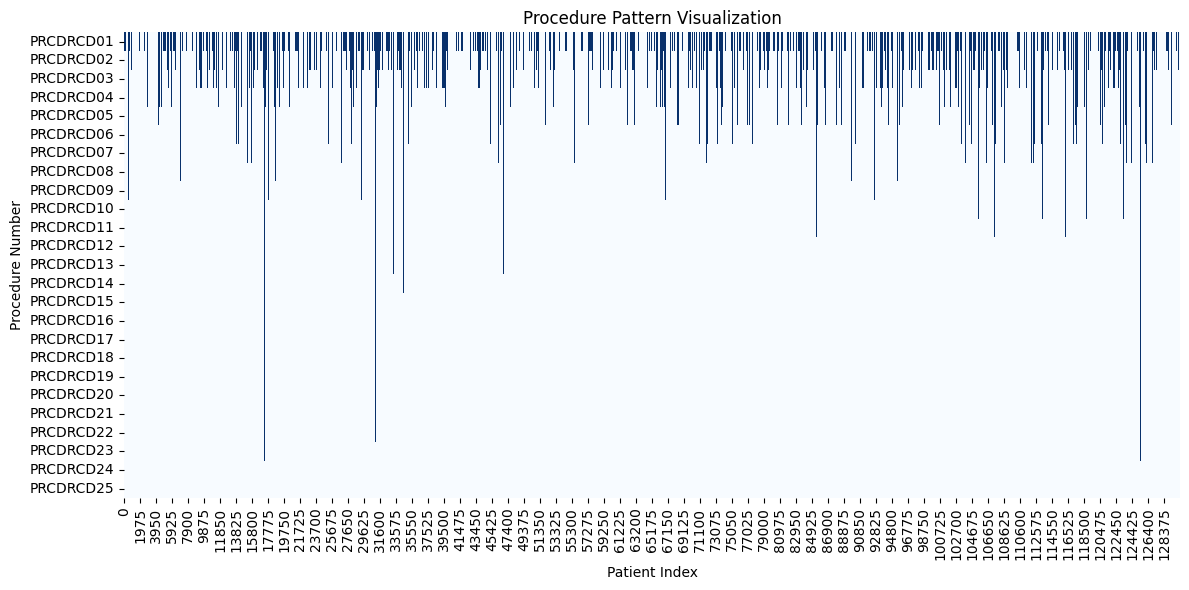

In [ ]:
# Visualize procedure presence
# Create a matrix where 1 means procedure exists, 0 means not exists
proc_presence = pd.DataFrame()
for i in range(1, 26):
    col = f'PRCDRCD{str(i).zfill(2)}'
    proc_presence[col] = (~df_temp[col].isna() & (df_temp[col] != '')).astype(int)


# Visualize the procedure pattern
plt.figure(figsize=(12, 6))
sns.heatmap(proc_presence.T, cmap='Blues', cbar=False)
plt.title('Procedure Pattern Visualization')
plt.xlabel('Patient Index')
plt.ylabel('Procedure Number')
plt.tight_layout()
plt.show()

In [ ]:
# by above analysis, we found that if a procedure is missing, all subsequent procedures are also missing. so nulls in procedure does't means that the procedure was not recorded but it means that the patient didn't have/need that procedure.

In [ ]:
# Let's check if the same pattern exists for diagnosis features
def check_diagnosis_pattern(row):
    """
    Checks if diagnoses follow the pattern:
    If diagnosis n is missing, then all diagnoses n+1 to 25 are also missing
    Returns True if pattern holds, False otherwise
    """
    diag_columns = [f'DGNSCD{str(i).zfill(2)}' for i in range(1, 26)]
    first_empty = None

    for i, col in enumerate(diag_columns):
        if pd.isna(row[col]) or row[col] == '':
            first_empty = i
            break

    if first_empty is None:  # All diagnoses are filled
        return True

    # Check if all diagnoses after first_empty are also empty
    for col in diag_columns[first_empty:]:
        if not pd.isna(row[col]) and row[col] != '':
            return False

    return True

In [ ]:
df_temp  = df.copy()

# Apply the function to each row
df_temp['diag_follows_pattern'] = df_temp.apply(check_diagnosis_pattern, axis=1)

# Count pattern compliance
pattern_count = df_temp['diag_follows_pattern'].value_counts()
print("Diagnosis Pattern Compliance:")
print(pattern_count)
print(f"Percentage of rows following pattern: {100 * pattern_count.get(True, 0) / len(df_temp):.2f}%")

Diagnosis Pattern Compliance:
diag_follows_pattern
True    130296
Name: count, dtype: int64
Percentage of rows following pattern: 100.00%


In [ ]:
# Diagnosis columns are also following the same pattern.

# Now we can reduce these 50 columns to 2 columns. these columns will indicate that how many procedures/diagnosis were performed on the patient.

# this is the first and most simplest approach to reduce the number of columns.



In [ ]:
# get all unique diagnosis codes
unique_diagnosis_codes = set()
all_diagnosis_codes = []
for i in range(1, 26):
    col = f'DGNSCD{str(i).zfill(2)}'
    unique_diagnosis_codes.update(df[col].dropna().unique())
    all_diagnosis_codes.extend(df[col].dropna())

print(f"Total unique diagnosis codes: {len(unique_diagnosis_codes)}")
print(f"all diagnosis codes: {len(all_diagnosis_codes)}")
# get all unique diagnosis codes
unique_procedure_codes = set()
all_procedure_codes = []
for i in range(1, 26):
    col = f'PRCDRCD{str(i).zfill(2)}'
    unique_procedure_codes.update(df[col].dropna().unique())
    all_procedure_codes.extend(df[col].dropna())

print(f"Total unique procedure codes: {len(unique_procedure_codes)}")
print(f"all procedures codes: {len(all_procedure_codes)}")

Total unique diagnosis codes: 9778
all diagnosis codes: 2178998
Total unique procedure codes: 4701
all procedures codes: 152469


##### Handling these columns

In [ ]:
proc_columns = [f'PRCDRCD{str(i).zfill(2)}' for i in range(1, 26)]
diag_columns = [f'DGNSCD{str(i).zfill(2)}' for i in range(1, 26)]

In [ ]:
df_count_based = df.copy()
df_position_based = df.copy()
df_grouped_codes = df.copy()

In [ ]:

# Method 1: Count-Based Features

df_count_based['num_diagnoses'] = df_count_based[diag_columns].notna().sum(axis=1)
df_count_based['num_procedures'] = df_count_based[proc_columns].notna().sum(axis=1)


df_count_based.drop(columns=diag_columns + proc_columns, inplace=True)

In [ ]:

# ----------------------------
# Method 2: Position-Based Features
# ----------------------------

# Primary diagnosis code
df_position_based['primary_diagnosis'] = df_position_based['DGNSCD01']

# If both diagnosis and procedure 01 are present, condition is treated
df_position_based['primary_condition_treated'] = df_position_based[['DGNSCD01', 'PRCDRCD01']].notna().all(axis=1).astype(int)

# Ratio of diagnoses that have procedures
def calculate_diag_proc_ratio(row):
    diag_count = 0
    treated_count = 0
    for i in range(1, 26):
        diag = row.get(f'DGNSCD{str(i).zfill(2)}')
        proc = row.get(f'PRCDRCD{str(i).zfill(2)}')
        if pd.notna(diag):
            diag_count += 1
            if pd.notna(proc):
                treated_count += 1
    return treated_count / diag_count if diag_count > 0 else 0

df_position_based['treatment_ratio'] = df_position_based.apply(calculate_diag_proc_ratio, axis=1)


# target encoding of primary diagnosis
primary_diag_target_encoding = df_position_based.groupby('primary_diagnosis')['Readmitted_30'].mean()
df_position_based['primary_diagnosis_encoded'] = df_position_based['primary_diagnosis'].map(primary_diag_target_encoding)

global_readmit_mean = df_position_based['Readmitted_30'].mean()
df_position_based['primary_diagnosis_encoded'] = df_position_based['primary_diagnosis_encoded'].fillna(global_readmit_mean)

df_position_based.drop(columns=['primary_diagnosis'], inplace=True)


df_position_based.drop(columns=diag_columns + proc_columns, inplace=True)

In [ ]:
# ----------------------------
# Method 3: Group/Select Important Codes
# ----------------------------

# Reduce diagnosis codes to their first 3 characters to represent groups
for col in diag_columns:
    df_grouped_codes[col] = df_grouped_codes[col].astype(str).str[:3]

# Get the top 20 most frequent diagnosis code groups
top_diag_groups = pd.Series(df_grouped_codes[diag_columns].values.ravel()).value_counts().nlargest(20).index

# Create binary features for top 20 diagnosis code groups
for code in top_diag_groups:
    df_grouped_codes[f'diag_code_{code}'] = df_grouped_codes[diag_columns].apply(lambda x: code in x.values, axis=1).astype(int)

# Drop original diagnosis and procedure columns (optional for modeling)
df_grouped_codes = df_grouped_codes.drop(columns=diag_columns + proc_columns)


#### Readmitted_30

In [ ]:
# check class imbalance in the target variable

<ipython-input-164-fd37183f8e7d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Readmitted_30', data=df, palette='Blues')


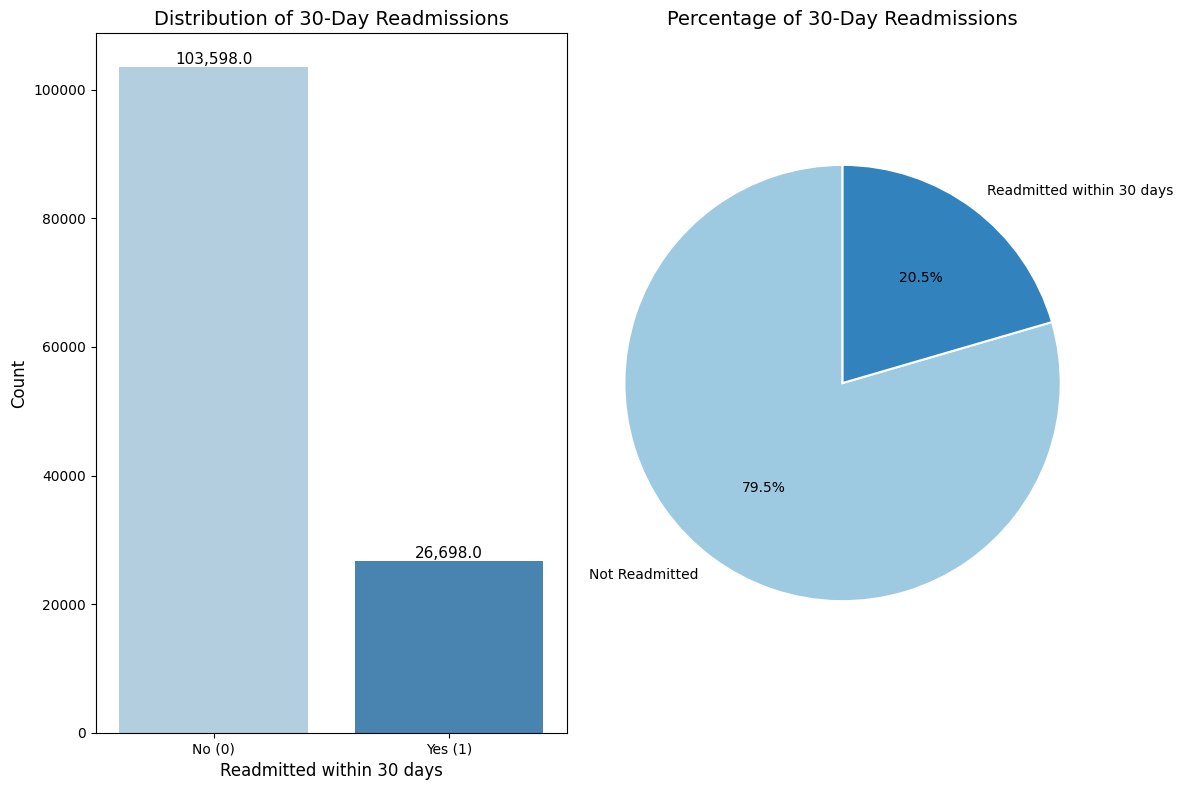

In [ ]:
plt.figure(figsize=(12, 8))

# Create a countplot for Readmitted_30
plt.subplot(1, 2, 1)
sns.countplot(x='Readmitted_30', data=df, palette='Blues')
plt.title('Distribution of 30-Day Readmissions', fontsize=14)
plt.xlabel('Readmitted within 30 days', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1], ['No (0)', 'Yes (1)'])

# Add count labels on top of bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():,}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='bottom', fontsize=11)

# Create a pie chart showing percentage distribution
plt.subplot(1, 2, 2)
readmit_counts = df['Readmitted_30'].value_counts()
labels = ['Not Readmitted', 'Readmitted within 30 days']
colors = ['#9ecae1', '#3182bd']
plt.pie(readmit_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors,
        wedgeprops={'edgecolor': 'white', 'linewidth': 1.5})
plt.title('Percentage of 30-Day Readmissions', fontsize=14)
plt.axis('equal')
plt.tight_layout()
plt.show()

In [ ]:
readmission_rate = df['Readmitted_30'].mean() * 100
print(f"30-Day Readmission Rate: {readmission_rate:.2f}%")
print(f"Total Patients: {len(df):,}")
print(f"Readmitted Patients: {df['Readmitted_30'].sum():,}")
print(f"Non-readmitted Patients: {len(df) - df['Readmitted_30'].sum():,}")

30-Day Readmission Rate: 20.49%
Total Patients: 130,296
Readmitted Patients: 26,698
Non-readmitted Patients: 103,598


#### Removing class imbalace from training data

In [ ]:
y = df['Readmitted_30']

In [ ]:
X_countbased = df_count_based.drop([ 'Readmitted_30'], axis=1)
X_position_based = df_position_based.drop([ 'Readmitted_30'], axis=1)
X_grouped_codes = df_grouped_codes.drop([ 'Readmitted_30'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

X_train_count, X_test_count, y_train, y_test = train_test_split(X_countbased, y, test_size=0.2, random_state=42)

X_train_position, X_test_position, y_train, y_test = train_test_split(X_position_based, y, test_size=0.2, random_state=42)

X_train_group, X_test_group, y_train, y_test = train_test_split(X_grouped_codes, y, test_size=0.2, random_state=42)

In [ ]:
from imblearn.over_sampling import ADASYN

adasyn = ADASYN(random_state=42)

X_resampled_count, y_resampled_count = adasyn.fit_resample(X_train_count, y_train)

#

In [ ]:
X_resampled_position, y_resampled_position = adasyn.fit_resample(X_train_position, y_train)


In [ ]:
X_resampled_group, y_resampled_group = adasyn.fit_resample(X_train_group, y_train)


In [ ]:
y_resampled_count.info()

<class 'pandas.core.series.Series'>
RangeIndex: 165291 entries, 0 to 165290
Series name: Readmitted_30
Non-Null Count   Dtype
--------------   -----
165291 non-null  int64
dtypes: int64(1)
memory usage: 1.3 MB


# Model Training

In [ ]:
!pip install catboost

In [ ]:
# use following df's to get data

# X_resampled_count, y_resampled_count ,X_test_count , y_test
# X_resampled_position, y_resampled_position , X_test_position , y_test
# X_resampled_group, y_resampled_group , X_test_group , y_test

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.preprocessing import StandardScaler


In [ ]:
def train_logistic_regression(X_train, X_test, y_train, y_test):
    """
    Train and evaluate a Logistic Regression model with data scaling.
    Parameters:
        X_train, X_test: Training and test features
        y_train, y_test: Training and test labels

    Returns:
        lr: Trained Logistic Regression model
        metrics: Dictionary containing evaluation metrics
    """

    scaler = StandardScaler()

    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    lr = LogisticRegression(random_state=42, max_iter=10000)
    lr.fit(X_train, y_train)

    y_pred = lr.predict(X_test)
    y_pred_proba = lr.predict_proba(X_test)[:, 1]

    metrics = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_pred_proba)
    }

    print(f"Accuracy: {metrics['accuracy']:.4f}")
    print(f"Precision: {metrics['precision']:.4f}")
    print(f"Recall: {metrics['recall']:.4f}")
    print(f"F1 Score: {metrics['f1']:.4f}")
    print(f"ROC AUC Score: {metrics['roc_auc']:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("----------------------------------------")

    return lr, metrics

lr_metrics_dict = {}

print("Training Logistic Regression on Count-Based Features...")
lr_model1, lr_metrics_dict['count'] = train_logistic_regression(X_resampled_count,X_test_count,y_resampled_count, y_test)

print("Training Logistic Regression on position...")
lr_model2, lr_metrics_dict['position'] = train_logistic_regression(X_resampled_position,X_test_position,y_resampled_position, y_test)

print("Training Logistic Regression on group...")
lr_model3, lr_metrics_dict['group'] = train_logistic_regression(X_resampled_group,X_test_group,y_resampled_group, y_test)

Training Logistic Regression on Count-Based Features...
----------------------------------------
Accuracy: 0.5571
Precision: 0.2436
Recall: 0.5593
F1 Score: 0.3394
ROC AUC Score: 0.5887

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.56      0.67     20759
           1       0.24      0.56      0.34      5301

    accuracy                           0.56     26060
   macro avg       0.54      0.56      0.50     26060
weighted avg       0.71      0.56      0.60     26060

Training Logistic Regression on position...
----------------------------------------
Accuracy: 0.5610
Precision: 0.2514
Recall: 0.5855
F1 Score: 0.3518
ROC AUC Score: 0.6112

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.55      0.67     20759
           1       0.25      0.59      0.35      5301

    accuracy                           0.56     26060
   macro avg       0.55      0.57      0.51    

In [ ]:
def train_random_forest(X_train, X_test, y_train, y_test):
    """
    Train and evaluate a Random Forest model
    Parameters:
        X_train, X_test: Training and test features
        y_train, y_test: Training and test labels

    Returns:
        rf: Trained Random Forest model
        metrics: Dictionary containing evaluation metrics
    """
    scaler = StandardScaler()

    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    rf = RandomForestClassifier(random_state=42)
    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_test)
    y_pred_proba = rf.predict_proba(X_test)[:,1]

    metrics = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_pred_proba)
    }

    print(f"Accuracy: {metrics['accuracy']:.4f}")
    print(f"Precision: {metrics['precision']:.4f}")
    print(f"Recall: {metrics['recall']:.4f}")
    print(f"F1 Score: {metrics['f1']:.4f}")
    print(f"ROC AUC Score: {metrics['roc_auc']:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("----------------------------------------")

    return rf, metrics

rf_metrics_dict = {}

print("Training Random Forest on Count-Based Features...")
rf_model1, rf_metrics_dict['count'] = train_random_forest(X_resampled_count,X_test_count,y_resampled_count, y_test)

print("Training Random Forest on position...")
rf_model2, rf_metrics_dict['position'] = train_logistic_regression(X_resampled_position,X_test_position,y_resampled_position, y_test)

print("Training Random Forest on group...")
rf_model3, rf_metrics_dict['group'] = train_logistic_regression(X_resampled_group,X_test_group,y_resampled_group, y_test)

Training Random Forest on Count-Based Features...


KeyboardInterrupt: 

In [ ]:
def train_xgboost(X_train, X_test, y_train, y_test):
    """
    Train and evaluate an XGBoost model
    Parameters:
        X_train, X_test: Training and test features
        y_train, y_test: Training and test labels

    Returns:
        xgb: Trained XGBoost model
        metrics: Dictionary containing evaluation metrics
    """

    xgb = XGBClassifier(random_state=42, eval_metric='logloss')
    xgb.fit(X_train, y_train)

    y_pred = xgb.predict(X_test)
    y_pred_proba = xgb.predict_proba(X_test)[:,1]

    metrics = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_pred_proba)
    }

    print(f"Accuracy: {metrics['accuracy']:.4f}")
    print(f"Precision: {metrics['precision']:.4f}")
    print(f"Recall: {metrics['recall']:.4f}")
    print(f"F1 Score: {metrics['f1']:.4f}")
    print(f"ROC AUC Score: {metrics['roc_auc']:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("----------------------------------------")

    return xgb, metrics

xgb_metrics_dict = {}

print("Training XGBoost on Count-Based Features...")
xgb_model1, xgb_metrics_dict['count'] = train_xgboost(X_resampled_count,X_test_count,y_resampled_count, y_test)

print("Training XGBoost on position...")
xgb_model2, xgb_metrics_dict['position'] = train_logistic_regression(X_resampled_position,X_test_position,y_resampled_position, y_test)

print("Training XGBoost on group...")
xgb_model3, xgb_metrics_dict['group'] = train_logistic_regression(X_resampled_group,X_test_group,y_resampled_group, y_test)


In [ ]:
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import StratifiedKFold
def train_catboost(X_train, X_test, y_train, y_test):
    """
    Train and evaluate a CatBoost model with optimized parameters
    Parameters:
        X_train, X_test: Training and test features
        y_train, y_test: Training and test labels

    Returns:
        cat: Trained CatBoost model
        metrics: Dictionary containing evaluation metrics
    """

    class_counts = np.bincount(y_train)
    total_samples = len(y_train)
    class_weights = {i: total_samples / (len(class_counts) * count) for i, count in enumerate(class_counts)}

    # Create evaluation pool with correct weights
    train_pool = Pool(X_train, y_train, weight=np.array([class_weights[y] for y in y_train]))
    eval_pool = Pool(X_test, y_test)

    # Optimized parameters for CatBoost
    params = {
        'iterations': 1000,
        'learning_rate': 0.03,
        'depth': 6,
        'l2_leaf_reg': 3,
        'bootstrap_type': 'Bayesian',
        'random_strength': 1,
        'random_seed': 42,
        'bagging_temperature': 1,
        'od_type': 'Iter',
        'od_wait': 50,
        'verbose': 0,
        'loss_function': 'Logloss',
        'eval_metric': 'AUC',
        'task_type': 'CPU',  # Change to 'GPU' if available
        'auto_class_weights': 'Balanced'
    }

    cat = CatBoostClassifier(**params)
    cat.fit(train_pool, eval_set=eval_pool, use_best_model=True, early_stopping_rounds=50)

    feature_importance = cat.get_feature_importance()
    feature_names = X_train.columns if hasattr(X_train, 'columns') else [f"feature_{i}" for i in range(X_train.shape[1])]

    y_pred = cat.predict(X_test)
    y_pred_proba = cat.predict_proba(X_test)[:,1]

    metrics = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_pred_proba)
    }

    print(f"Accuracy: {metrics['accuracy']:.4f}")
    print(f"Precision: {metrics['precision']:.4f}")
    print(f"Recall: {metrics['recall']:.4f}")
    print(f"F1 Score: {metrics['f1']:.4f}")
    print(f"ROC AUC Score: {metrics['roc_auc']:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("----------------------------------------")

    print("\nTop 10 Feature Importance:")
    sorted_idx = np.argsort(feature_importance)[::-1]
    for i in range(min(10, len(feature_names))):
        print(f"{feature_names[sorted_idx[i]]}: {feature_importance[sorted_idx[i]]:.4f}")

    return cat, metrics

cat_metrics_dict = {}

print("Training CatBoost on Count-Based Features...")
cat_model1, cat_metrics_dict['count'] = train_catboost(X_resampled_count, X_test_count, y_resampled_count, y_test)

print("Training CatBoost on position...")
cat_model2, cat_metrics_dict['position'] = train_catboost(X_resampled_position, X_test_position, y_resampled_position, y_test)

print("Training CatBoost on group...")
cat_model3, cat_metrics_dict['group'] = train_catboost(X_resampled_group, X_test_group, y_resampled_group, y_test)


Training CatBoost on Count-Based Features...
----------------------------------------
Accuracy: 0.5875
Precision: 0.2554
Recall: 0.5365
F1 Score: 0.3460
ROC AUC Score: 0.6011

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.60      0.70     20759
           1       0.26      0.54      0.35      5301

    accuracy                           0.59     26060
   macro avg       0.55      0.57      0.52     26060
weighted avg       0.72      0.59      0.63     26060


Top 10 Feature Importance:
AD_DGNS_encoded: 78.7749
STUS_CD_encoded: 9.2321
TYPE_ADM_encoded: 6.8183
num_diagnoses: 2.8274
SRC_ADMS_encoded: 0.8454
admit_dayofweek: 0.7041
discharge_month: 0.5913
STAY_DRG_CD: 0.2065
num_procedures: 0.0000
LENGTH_OF_STAY: 0.0000
Training CatBoost on position...
----------------------------------------
Accuracy: 0.6951
Precision: 0.2922
Recall: 0.3509
F1 Score: 0.3189
ROC AUC Score: 0.6252

Classification Report:
              precision 

CatBoostError: catboost/libs/data/model_dataset_compatibility.cpp:81: At position 8 should be feature with name primary_condition_treated (found num_diagnoses).

In [ ]:
def ensemble_predict(models, X_test):
    """
    Create an ensemble prediction from multiple models
    """
    import numpy as np

    y_pred_probas = np.array([model.predict_proba(X_test)[:, 1] for model in models])
    y_pred_proba = np.mean(y_pred_probas, axis=0)
    y_pred = (y_pred_proba > 0.5).astype(int)
    return y_pred, y_pred_proba

# Ensemble prediction
print("\nEnsemble Model Evaluation:")
models = [cat_model1, cat_model2, cat_model3]
y_ensemble_pred, y_ensemble_pred_proba = ensemble_predict(models, X_test_count)  # Using count features as base

# Calculate ensemble metrics
ensemble_metrics = {
    'accuracy': accuracy_score(y_test, y_ensemble_pred),
    'precision': precision_score(y_test, y_ensemble_pred),
    'recall': recall_score(y_test, y_ensemble_pred),
    'f1': f1_score(y_test, y_ensemble_pred),
    'roc_auc': roc_auc_score(y_test, y_ensemble_pred_proba)
}

print("----------------------------------------")
print(f"Ensemble Accuracy: {ensemble_metrics['accuracy']:.4f}")
print(f"Ensemble Precision: {ensemble_metrics['precision']:.4f}")
print(f"Ensemble Recall: {ensemble_metrics['recall']:.4f}")
print(f"Ensemble F1 Score: {ensemble_metrics['f1']:.4f}")
print(f"Ensemble ROC AUC Score: {ensemble_metrics['roc_auc']:.4f}")
print("\nEnsemble Classification Report:")
print(classification_report(y_test, y_ensemble_pred))

In [ ]:
def train_knn(X_train, X_test, y_train, y_test):
    """
    Train and evaluate a K-Nearest Neighbors model
    Parameters:
        X_train, X_test: Training and test features
        y_train, y_test: Training and test labels

    Returns:
        knn: Trained KNN model
        metrics: Dictionary containing evaluation metrics
    """
    scaler = StandardScaler()

    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)
    y_pred_proba = knn.predict_proba(X_test)[:,1]

    metrics = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_pred_proba)
    }

    print(f"Accuracy: {metrics['accuracy']:.4f}")
    print(f"Precision: {metrics['precision']:.4f}")
    print(f"Recall: {metrics['recall']:.4f}")
    print(f"F1 Score: {metrics['f1']:.4f}")
    print(f"ROC AUC Score: {metrics['roc_auc']:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("----------------------------------------")

    return knn, metrics

knn_metrics_dict = {}

print("Training KNN on Count-Based Features...")
knn_model1, knn_metrics_dict['count'] = train_knn(X_resampled_count,X_test_count,y_resampled_count, y_test)

print("Training KNN on position...")
knn_model2, knn_metrics_dict['position'] = train_logistic_regression(X_resampled_position,X_test_position,y_resampled_position, y_test)

print("Training KNN on group...")
knn_model3, knn_metrics_dict['count'] = train_logistic_regression(X_resampled_group,X_test_group,y_resampled_group, y_test)


In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def train_stacking(X_train, X_test, y_train, y_test):
    """
    Train and evaluate a stacking ensemble model.

    Parameters:
        X_train, X_test: Training and test features
        y_train, y_test: Training and test labels

    Returns:
        stacking_model: Trained StackingClassifier
        metrics: Dictionary containing evaluation metrics
    """
    estimators = [
        ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
        ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42)),
        ('ada', AdaBoostClassifier(n_estimators=100, random_state=42))
    ]

    stacking_model = StackingClassifier(
        estimators=estimators,
        final_estimator=LogisticRegression(),
        cv=5
    )

    stacking_model.fit(X_train, y_train)

    # Make predictions
    y_pred = stacking_model.predict(X_test)
    y_pred_proba = stacking_model.predict_proba(X_test)[:, 1]

    # Calculate metrics
    metrics = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_pred_proba)
    }

    # Print results
    print("Stacking Results:")
    print(f"Accuracy: {metrics['accuracy']:.4f}")
    print(f"Precision: {metrics['precision']:.4f}")
    print(f"Recall: {metrics['recall']:.4f}")
    print(f"F1 Score: {metrics['f1']:.4f}")
    print(f"ROC AUC Score: {metrics['roc_auc']:.4f}")

    return stacking_model, metrics

stacking_metrics_dict = {}

print("Training Stacking Ensemble on Count-Based Features...")
stacking_model1, stacking_metrics_dict['count'] = train_stacking(X_resampled_count, X_test_count, y_resampled_count, y_test)

print("Training Stacking Ensemble on position...")
stacking_model2, stacking_metrics_dict['position'] = train_stacking(X_resampled_position, X_test_position, y_resampled_position, y_test)

print("Training Stacking Ensemble on group...")
stacking_model3, stacking_metrics_dict['group'] = train_stacking(X_resampled_group, X_test_group, y_resampled_group, y_test)

#### Model comparision

In [ ]:
all_model_accuracies = {}

for dataset, metrics in lr_metrics_dict.items():
  all_model_accuracies[f"Logistic Regression ({dataset})"] = metrics['accuracy']

for dataset, metrics in rf_metrics_dict.items():
  all_model_accuracies[f"Random Forest ({dataset})"] = metrics['accuracy']

for dataset, metrics in xgb_metrics_dict.items():
  all_model_accuracies[f"XGBoost ({dataset})"] = metrics['accuracy']

for dataset, metrics in cat_metrics_dict.items():
  all_model_accuracies[f"CatBoost ({dataset})"] = metrics['accuracy']

for dataset, metrics in knn_metrics_dict.items():
  all_model_accuracies[f"KNN ({dataset})"] = metrics['accuracy']

for dataset, metrics in stacking_metrics_dict.items():
  all_model_accuracies[f"Stacking ({dataset})"] = metrics['accuracy']

best_model = max(all_model_accuracies, key=all_model_accuracies.get)
best_accuracy = all_model_accuracies[best_model]

print(f"The best performing model is {best_model} with an accuracy of {best_accuracy:.4f}")


In [ ]:
all_model_precision = {}

for dataset, metrics in lr_metrics_dict.items():
  all_model_precision[f"Logistic Regression ({dataset})"] = metrics['precision']

for dataset, metrics in rf_metrics_dict.items():
  all_model_precision[f"Random Forest ({dataset})"] = metrics['precision']

for dataset, metrics in xgb_metrics_dict.items():
  all_model_precision[f"XGBoost ({dataset})"] = metrics['precision']

for dataset, metrics in cat_metrics_dict.items():
  all_model_precision[f"CatBoost ({dataset})"] = metrics['precision']

for dataset, metrics in knn_metrics_dict.items():
  all_model_precision[f"KNN ({dataset})"] = metrics['precision']

for dataset, metrics in stacking_metrics_dict.items():
  all_model_precision[f"Stacking ({dataset})"] = metrics['precision']

best_model_percision = max(all_model_precision, key=all_model_precision.get)
best_precision = all_model_precision[best_model_percision]

print(f"The best performing model is {best_model_percision} with an precision of {best_precision:.4f}")


In [ ]:
all_model_recall = {}

for dataset, metrics in lr_metrics_dict.items():
  all_model_recall[f"Logistic Regression ({dataset})"] = metrics['recall']

for dataset, metrics in rf_metrics_dict.items():
  all_model_recall[f"Random Forest ({dataset})"] = metrics['recall']

for dataset, metrics in xgb_metrics_dict.items():
  all_model_recall[f"XGBoost ({dataset})"] = metrics['recall']

for dataset, metrics in cat_metrics_dict.items():
  all_model_recall[f"CatBoost ({dataset})"] = metrics['recall']

for dataset, metrics in knn_metrics_dict.items():
  all_model_recall[f"KNN ({dataset})"] = metrics['recall']

for dataset, metrics in stacking_metrics_dict.items():
  all_model_recall[f"Stacking ({dataset})"] = metrics['recall']

best_model_recall = max(all_model_recall, key=all_model_recall.get)
best_recall = all_model_recall[best_model_recall]

print(f"The best performing model is {best_model_recall} with an recall of {best_recall:.4f}")


In [ ]:
all_model_roc = {}

for dataset, metrics in lr_metrics_dict.items():
  all_model_roc[f"Logistic Regression ({dataset})"] = metrics['roc_auc']

for dataset, metrics in rf_metrics_dict.items():
  all_model_roc[f"Random Forest ({dataset})"] = metrics['roc_auc']

for dataset, metrics in xgb_metrics_dict.items():
  all_model_roc[f"XGBoost ({dataset})"] = metrics['roc_auc']

for dataset, metrics in cat_metrics_dict.items():
  all_model_roc[f"CatBoost ({dataset})"] = metrics['roc_auc']

for dataset, metrics in knn_metrics_dict.items():
  all_model_roc[f"KNN ({dataset})"] = metrics['roc_auc']

for dataset, metrics in stacking_metrics_dict.items():
  all_model_roc[f"Stacking ({dataset})"] = metrics['roc_auc']

best_model_roc = max(all_model_roc, key=all_model_roc.get)
best_roc = all_model_roc[best_model_roc]

print(f"The best performing model is {best_model_roc} with an roc_auc of {best_roc:.4f}")


In [ ]:
all_model_f1 = {}

for dataset, metrics in lr_metrics_dict.items():
  all_model_f1[f"Logistic Regression ({dataset})"] = metrics['f1']

for dataset, metrics in rf_metrics_dict.items():
  all_model_f1[f"Random Forest ({dataset})"] = metrics['f1']

for dataset, metrics in xgb_metrics_dict.items():
  all_model_f1[f"XGBoost ({dataset})"] = metrics['f1']

for dataset, metrics in cat_metrics_dict.items():
  all_model_f1[f"CatBoost ({dataset})"] = metrics['f1']

for dataset, metrics in knn_metrics_dict.items():
  all_model_f1[f"KNN ({dataset})"] = metrics['f1']

for dataset, metrics in stacking_metrics_dict.items():
  all_model_f1[f"Stacking ({dataset})"] = metrics['f1']

best_model_f1 = max(all_model_f1, key=all_model_f1.get)
best_f1 = all_model_f1[best_model_f1]

print(f"The best performing model is {best_model_f1} with an F1 of {best_f1:.4f}")


# Hyper paramter tunning of catboost

In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV


param_grid = {
    'iterations': [100, 200],  # Number of boosting iterations
    'learning_rate': [0.01, 0.1],  # Step size shrinkage used in update to prevents overfitting
    'depth': [4, 6],  # Depth of the trees
    'l2_leaf_reg': [1, 3],  # L2 regularization term on weights of leaves
    'border_count': [32, 64], # Number of splits for numerical features
}

cat = CatBoostClassifier(random_state=42, verbose=0)

grid_search = GridSearchCV(cat, param_grid, cv=3, scoring='roc_auc', n_jobs=-1)

grid_search.fit(X_resampled_count, y_resampled_count)

print("Best parameters:", grid_search.best_params_)
print("Best ROC AUC score:", grid_search.best_score_)

best_cat_model = grid_search.best_estimator_
y_pred = best_cat_model.predict(X_test_count)
y_pred_proba = best_cat_model.predict_proba(X_test_count)[:, 1]


In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score

print("Test Set Performance:")
print(classification_report(y_test, y_pred))
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_proba)}")
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")

# Testing

In [ ]:
from sklearn.preprocessing import LabelEncoder
import joblib

def preprocess(test_df):
      test_df = test_df.replace('-', pd.NA)

      ID = test_df['ID']
      test_df.drop(columns=['ID'], inplace=True)

      test_df['STAY_DRG_CD'] = test_df['STAY_DRG_CD'].fillna(test_df['stay_drg_cd'])
      test_df['STAY_DRG_CD'] = test_df['STAY_DRG_CD'].fillna(test_df['STAY_DRG_CD'].mode()[0])
      test_df.drop(columns=['stay_drg_cd'], inplace=True)
      test_df['STAY_DRG_CD'] = test_df['STAY_DRG_CD'].astype('int')

      test_df['STAY_FROM_DT'] = pd.to_datetime(test_df['STAY_FROM_DT'])
      test_df['STAY_THRU_DT'] = pd.to_datetime(test_df['STAY_THRU_DT'])
      test_df['LENGTH_OF_STAY'] = (test_df['STAY_THRU_DT'] - test_df['STAY_FROM_DT']).dt.days
      test_df['admit_dayofweek'] = test_df['STAY_FROM_DT'].dt.dayofweek
      test_df['discharge_month'] = test_df['STAY_THRU_DT'].dt.month
      test_df.drop(columns=['STAY_FROM_DT','STAY_THRU_DT'], inplace=True)

      le = LabelEncoder()
      test_df['STUS_CD_encoded'] = le.fit_transform(test_df['STUS_CD'])
      test_df.drop(columns=['STUS_CD'], inplace=True)

      le = LabelEncoder()
      test_df['TYPE_ADM_encoded'] = le.fit_transform(test_df['TYPE_ADM'])
      test_df.drop(columns=['TYPE_ADM'], inplace=True)

      le = LabelEncoder()
      test_df['SRC_ADMS_encoded'] = le.fit_transform(test_df['SRC_ADMS'])
      test_df.drop(columns=['SRC_ADMS'], inplace=True)


      global_mean = joblib.load('global_mean.pkl')
      target_encoded = joblib.load('target_encoded.pkl')
      test_df['AD_DGNS_encoded'] = test_df['AD_DGNS'].map(target_encoded)
      test_df['AD_DGNS_encoded'] = test_df['AD_DGNS_encoded'].fillna(global_mean)
      test_df.drop(columns=['AD_DGNS'], inplace=True)

      proc_columns = [f'PRCDRCD{str(i).zfill(2)}' for i in range(1, 26)]
      diag_columns = [f'DGNSCD{str(i).zfill(2)}' for i in range(1, 26)]
      # Method 1: Count-Based Features
      df_count_based_temp = test_df.copy()
      df_count_based_temp['num_diagnoses'] = df_count_based_temp[diag_columns].notna().sum(axis=1)
      df_count_based_temp['num_procedures'] = df_count_based_temp[proc_columns].notna().sum(axis=1)
      df_count_based_temp.drop(columns=diag_columns + proc_columns, inplace=True)


      return df_count_based_temp,ID


In [ ]:
test_df = pd.read_csv('test.csv')

df_count_based_temp,ID = preprocess(test_df)

In [ ]:
predictions = cat_model1.predict(df_count_based_temp)

In [ ]:
pd.DataFrame({'ID': ID, 'Readmitted_30': predictions}).to_csv('submission.csv', index=False)